In [1]:
# change dir to project root
import os

os.chdir('..')

print(os.getcwd())

/home/ra/Codes/kuramoto


In [2]:
import numpy as np

from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

from kuramoto.kuramoto import kuramoto

In [3]:
# set up parameters
n_osc = 32
k = 1

del_t = 1e-2
max_t = 5

In [4]:
thetas = np.random.uniform(low=0, high=2*np.pi, size=n_osc)
#thetas = np.random.normal(loc=0, scale=np.pi, size=n_osc)
omegas = np.random.normal(loc=np.pi, scale=np.pi, size=n_osc)

t = np.arange(0, max_t, del_t)

In [5]:
def integrate(omega, t, k, theta, del_t, max_t):
    theta_history = []
    for i in range(int(max_t/del_t)):
        theta = theta + del_t * kuramoto(omega, t, k, theta)
        theta = np.mod(theta, 2*np.pi) 
        theta_history.append(theta)
    return theta_history

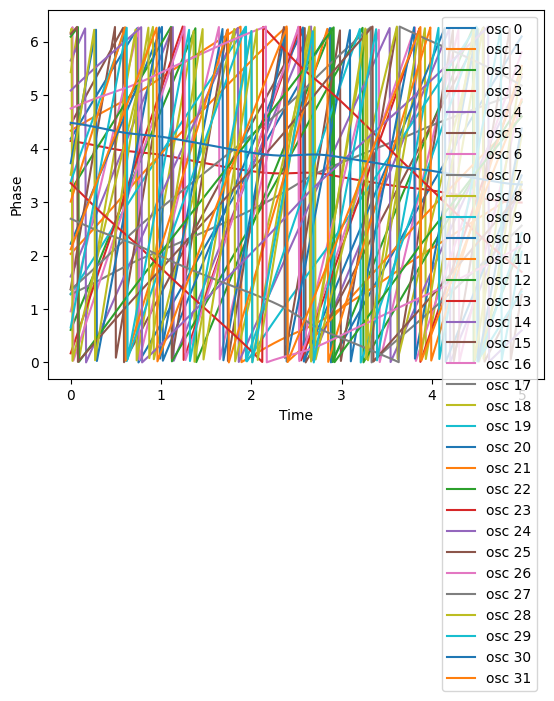

In [6]:
#y = odeint(kuramoto, omegas, t, args=(k, thetas))
y = integrate(omegas, t, k, thetas, del_t, max_t)
y = np.mod(y, 2 * np.pi)
for i in range(n_osc):
    plt.plot(t, y[:,i], label=f'osc {i}', )
    
plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()
plt.show()

In [7]:
# # make animation of phase space
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.set_ylim(0, 1)
# for i in range(n_osc):
#     ax.plot(y[0,i], 1, 'o')

# def update_plot(frame):
#     ax.clear()
#     ax.set_ylim(0, 1)
#     for i in range(n_osc):
#         ax.plot(y[frame,i], 1, 'o')
#     ax.set_title('Time = {:.2f}'.format(frame*del_t))
#     return ax,

# anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(t)), interval=1)

# FFwriter = animation.FFMpegWriter(fps=20)
# anim.save(f'kuramoto_test-{k}-{n_osc}.mp4', writer=FFwriter)

In [8]:
k = 8

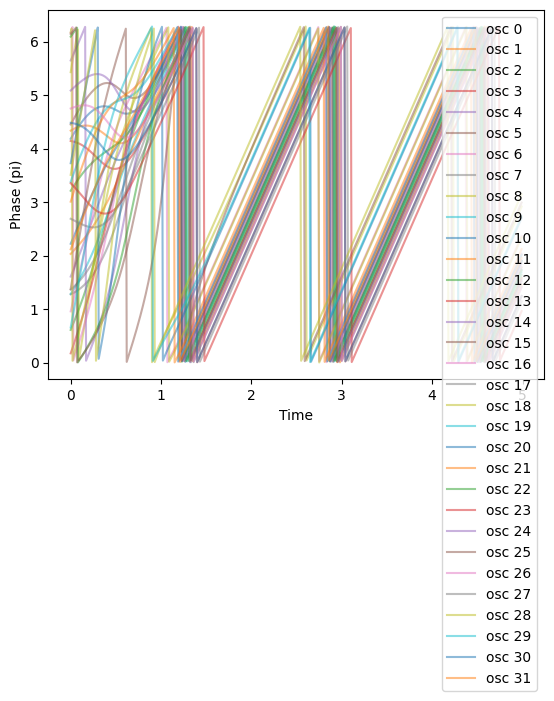

In [9]:
y = integrate(omegas, t, k, thetas, del_t, max_t)
y = np.mod(y, 2 * np.pi)

for i in range(n_osc):
    plt.plot(t, y[:,i], label=f'osc {i}', alpha=0.5)
    
plt.xlabel('Time')
plt.ylabel('Phase (pi)')
plt.legend()
plt.show()

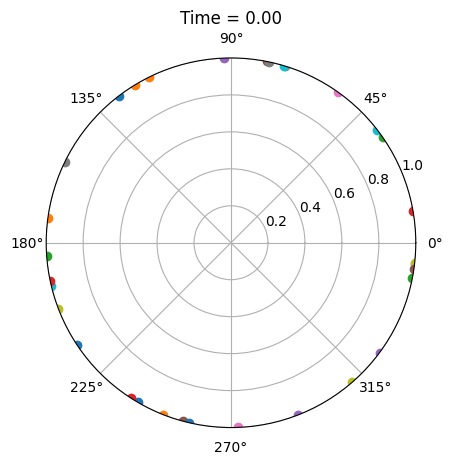

In [10]:
# make animation of phase space
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_ylim(0, 1)
for i in range(n_osc):
    ax.plot(y[0,i], 1, 'o')

def update_plot(frame):
    ax.clear()
    ax.set_ylim(0, 1)
    for i in range(n_osc):
        ax.plot(y[frame,i], 1, 'o')
    ax.set_title('Time = {:.2f}'.format(frame*del_t))
    return ax,

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(t)), interval=1)

FFwriter = animation.FFMpegWriter(fps=20)
anim.save(f'kuramoto_test-{k}-{n_osc}.mp4', writer=FFwriter)